# Pymaceuticals Inc.
---

### Analysis

- Tumor volume for each treatment appears to be evenly distributed for Capomulin, Ramicane, and Ceftamin. Infubinol appears to have a potential outlier showing one mouse to have a significanly lower tumor volume. It is recommended not to include this mouse's data as it could skew the distribution of the statistical data. The tumor volume for mouse b128 is receiving Capomulin and it can be observed that the tumor volume significantly decreased after 35 days and slightly increased at 40 days. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import pathlib as path
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata,study_results, on='Mouse ID')

# Display the data table for preview
mouse_study.head()
#Read the mouse data
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
# Checking the number of mice.
mice_total = len(mouse_study['Mouse ID'].unique())
mice_total

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_study[mouse_study.duplicated(subset=['Mouse ID','Timepoint'],keep='first')]
duplicate_mice['Mouse ID']
np.array(duplicate_mice['Mouse ID'])

array(['g989', 'g989', 'g989', 'g989', 'g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice = mouse_study[mouse_study.duplicated(subset=['Mouse ID','Timepoint'],keep='first')]
values_to_remove = duplicate_mice.index
filtered_duplicate = mouse_study.loc[mouse_study['Mouse ID']=='g989',:]
filtered_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_study.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='first')
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
mice_total2 = len(clean_data['Mouse ID'].unique())
mice_total2

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_dev = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
clean_data_df = pd.DataFrame({'Mean Tumor Volume':mean,'Median Tumor Volume':median,'Tumor Volume Variance':variance,'Tumor Volume Std. Dev.':std_dev,'Tumor Volume Std. Err':sem

})
clean_data_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean2='mean',
    median2='median',
    variance2='var',
    std_dev2='std',
    sem2='sem'
).reset_index()
summary_statistics.set_index(['Drug Regimen'])

,mean2,median2,variance2,std_dev2,sem2
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
# First create a group series using the 'Drug Regimen'column and, counting the number of data points for each Drug Regimen
mice_count = clean_data['Drug Regimen'].value_counts()
mice_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: count, dtype: int64

Text(0, 0.5, '# of Observed Mouse Timepoints')

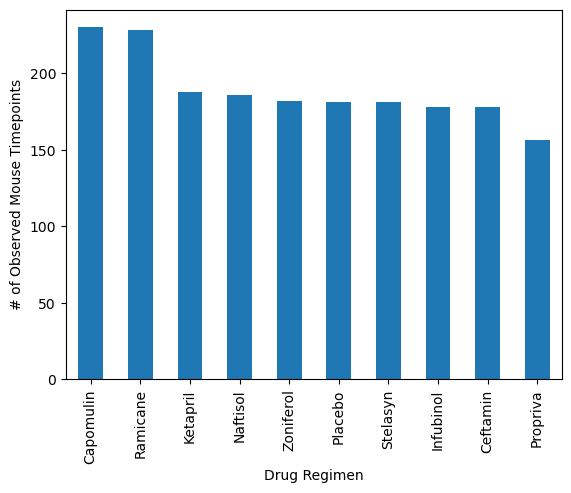

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts_graph = mice_count.plot(kind='bar')
regimen_counts_graph.set_ylabel('# of Observed Mouse Timepoints')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

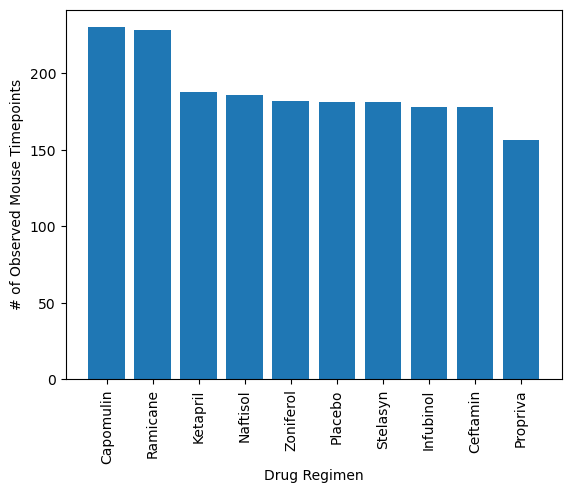

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis,y_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)



Text(0, 0.5, 'count')

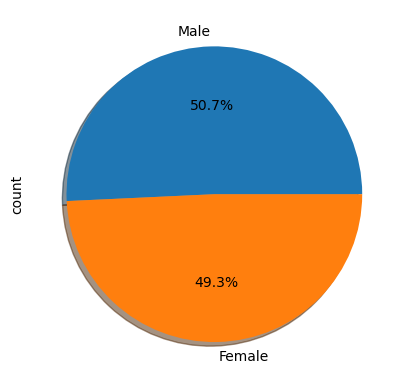

In [34]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = clean_data['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=360)
plt.ylabel('count')

Text(0, 0.5, 'count')

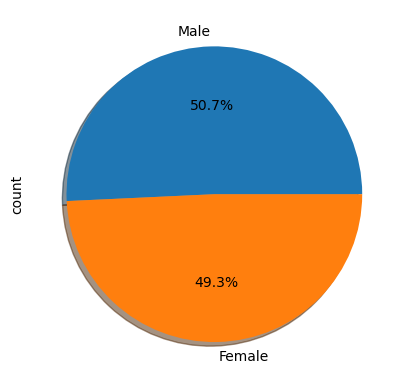

In [33]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

gender_counts = clean_data['Sex'].value_counts()
# Make the pie chart
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%', startangle=360, shadow=True)
plt.ylabel('count')

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_data.groupby('Mouse ID').max()['Timepoint'].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_cd = pd.merge(greatest_timepoint,clean_data,on=['Mouse ID','Timepoint'])


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume2 = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for x in treatment:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_cd[merged_cd['Drug Regimen'] == x]['Tumor Volume (mm3)']

    q1 = treatment_data.quantile(0.25)
    q3 = treatment_data.quantile(0.75)
    iqr = q3 - q1

    low = q1 - 1.5 * iqr
    up = q3 + 1.5 * iqr
    # add subset
    tumor_volume2.append(treatment_data)

    # Determine outliers using upper and lower bounds
    

    outliers = treatment_data[(treatment_data < low)|(treatment_data>up)]
    print(f'{x} potential outliers: {outliers.tolist()}')
 

Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: [36.3213458]
Ceftamin potential outliers: []


([<matplotlib.axis.XTick at 0x29d4b4d4f50>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

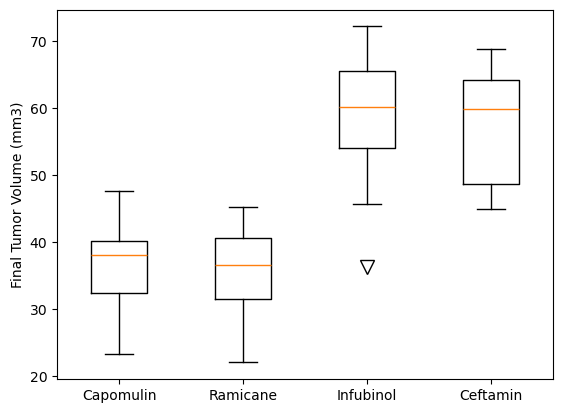

In [25]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


capomulin_df = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin',:]
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol,clean_data, on=('Mouse ID','Timepoint'),how='left')
capomulin_tumors = capomulin_merge['Tumor Volume (mm3)']
quartiles1 = capomulin_tumors.quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1- (1.5*iqr1)

ramicane_df = clean_data.loc[clean_data['Drug Regimen'] == 'Ramicane',:]
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol,clean_data, on=('Mouse ID','Timepoint'),how='left')
ramicane_tumors = ramicane_merge['Tumor Volume (mm3)']
quartiles2 = ramicane_tumors.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 - (1.5*iqr2)

infubinol_df = clean_data.loc[clean_data['Drug Regimen'] == 'Infubinol',:]
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol,clean_data, on=('Mouse ID','Timepoint'),how='left')
infubinol_tumors = infubinol_merge['Tumor Volume (mm3)']
quartiles3 = infubinol_tumors.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3
lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 - (1.5*iqr3)

ceftamin_df = clean_data.loc[clean_data['Drug Regimen'] == 'Ceftamin',:]
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol,clean_data, on=('Mouse ID','Timepoint'),how='left')
ceftamin_tumors = ceftamin_merge['Tumor Volume (mm3)']
quartiles4 = ceftamin_tumors.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4
lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 - (1.5*iqr4)

data_to_plot = [capomulin_tumors, ramicane_tumors,infubinol_tumors,ceftamin_tumors]
regimen = ['Capomulin']



treatment_groups = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
plt.boxplot(data_to_plot,flierprops=dict(marker='v',markersize=10))
plt.ylabel('Final Tumor Volume (mm3)')

plt.xticks([1,2,3,4],treatment)

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

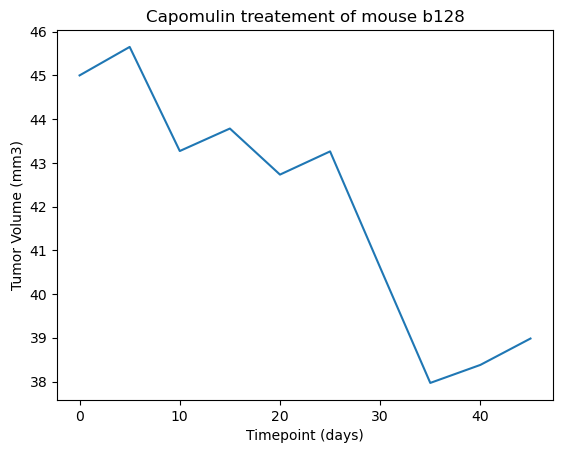

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = clean_data[clean_data['Mouse ID'] == 'b128']
timepoint = capomulin['Timepoint']
tumor_volume3 = capomulin['Tumor Volume (mm3)']
plt.plot(timepoint,tumor_volume3)
plt.title('Capomulin treatement of mouse b128')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, ' Avg Tumor Volume (mm3)')

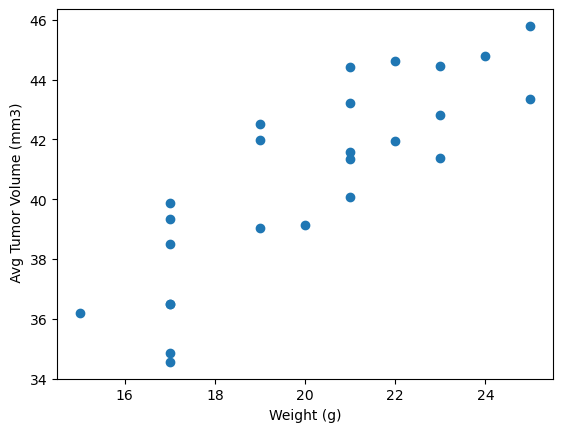

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


avg = capomulin_df.groupby(['Mouse ID']).mean(numeric_only=True)
#['Tumor Volume (mm3)'].mean().reset_index())
plt.scatter(avg['Weight (g)'],avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel(' Avg Tumor Volume (mm3)')

## Correlation and Regression

Text(0, 0.5, ' Avg Tumor Volume (mm3)')

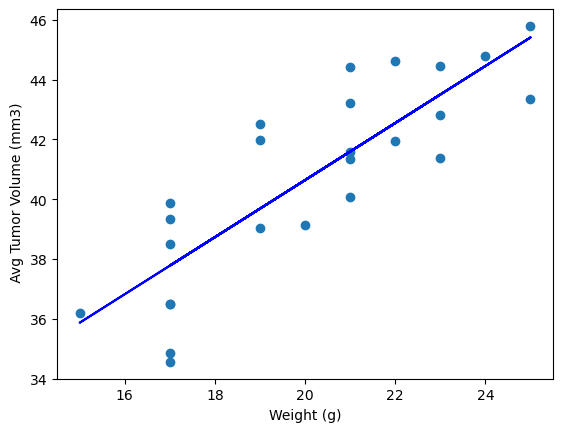

In [32]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
(slope, intercept,rvalue,pvalue,stderr) = linregress(avg['Weight (g)'],avg['Tumor Volume (mm3)'])

regress_values = avg['Weight (g)'] * slope + intercept

plt.scatter(avg['Weight (g)'],avg['Tumor Volume (mm3)'])
plt.plot(avg['Weight (g)'],regress_values,color='b')
plt.xlabel('Weight (g)')
plt.ylabel(' Avg Tumor Volume (mm3)')